In [2]:
# import trecs
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from collections import defaultdict
from chaney_utils import (
    load_sim_results,
    merge_results,
    graph_metrics,
    graph_metrics_loglog,
    graph_relative_to_ideal,
)
id_to_readable = {
    "ideal": "ideal", 
    "target_ideal": "target ideal",
    "content_chaney": "content filtering basic",
    "content_chaney_j_1.0": "content filtering a=1.0",
    "content_chaney_j_3.0": "content filtering a=3.0",
    "content_chaney_j_0.5": "content filtering a=0.5",
    "popularity": "popularity", 
    "random": "random"
}
colors = {
    "content_chaney":"tab:green",
     "content_chaney_j_3.0": "tab:red",
     "content_chaney_j_1.0": "tab:purple", 
     "content_chaney_j_0.5": "tab:brown"
}

In [3]:
# results = merge_results(["udpc_ouput_normd"])
results = merge_results(["udpc_ouput"])

startup_iters = 50

sim_iters = 350
timesteps = startup_iters + sim_iters
DEBUG = True


#### Degree of Preference Change
Jiang's (L2 norm U_0 - U_t) or Passino's (Total Variation Distance)
will need a custom metric :(

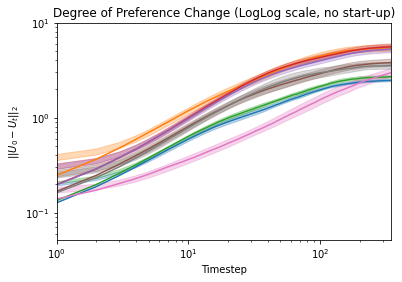

In [4]:
metric_str = "pref_change_l2"
model_keys = ["ideal", "target_ideal", "content_chaney", "content_chaney_j_3.0", "content_chaney_j_1.0", "content_chaney_j_0.5", "random", "popularity"]

graph_metrics_loglog(results, metric_str, model_keys, id_to_readable, mult_sd=1.0, conf_sigma=3.0)#, colors=colors)
plt.xlim(1, timesteps-50)
plt.yticks([0.1, 1, 10])
plt.xlabel("Timestep")
plt.ylabel("$ || U_0 - U_t || _2$")
plt.title("Degree of Preference Change (LogLog scale, no start-up)")
plt.savefig("figures/pref_change_l2_loglog.pdf", bbox_inches='tight')

#### RMSE (Accuracy)

c:\Users\0pink\anaconda3\lib\site-packages\numpy\core\_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\0pink\anaconda3\lib\site-packages\numpy\core\_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\0pink\anaconda3\lib\site-packages\numpy\core\_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\0pink\anaconda3\lib\site-packages\numpy\core\_methods.py:229: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


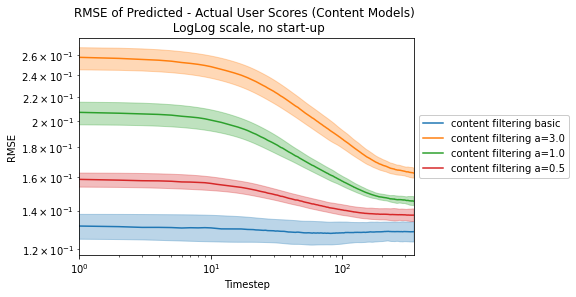

In [15]:
metric_str = "rmse"
model_keys = ["content_chaney", "content_chaney_j_3.0", "content_chaney_j_1.0", "content_chaney_j_0.5"]#, "random"]#, "popularity"]

graph_metrics_loglog(results, metric_str, model_keys, id_to_readable, mult_sd=1.0, conf_sigma=3.0)#, colors=colors)
# graph_relative_to_ideal(results, "rmse", model_keys, id_to_readable, mult_sd=1.0, conf_sigma=3.0, absolute_measure=False)

plt.xlim(1, timesteps-50)
plt.legend(facecolor='white', framealpha=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Timestep")
plt.ylabel("RMSE")
plt.title("RMSE of Predicted - Actual User Scores (Content Models) \n LogLog scale, no start-up")
plt.savefig("figures/rmse_content_loglog.pdf", bbox_inches='tight')

#### Diversity

Interaction Spread: Measures the diversity of the interactions between users and items. Specifically, at each timestep, it measures whether interactions are spread among many items or only a few items.

AverageFeatureScoreRange: Measures the average range (across users) of item attributes for items users were recommended at a time step. (From a Willemson Paper)

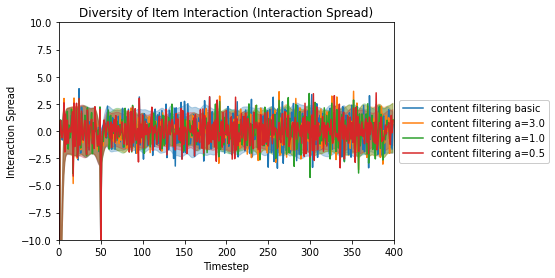

In [33]:
model_keys = ["ideal", "target_ideal", "content_chaney", "content_chaney_j_3.0", "content_chaney_j_1.0", "content_chaney_j_0.5", "random", "popularity"]
model_keys = ["content_chaney", "content_chaney_j_3.0", "content_chaney_j_1.0", "content_chaney_j_0.5"]#, "random"]#, "popularity"]

metric_str = "interaction_spread"

graph_metrics(results, metric_str, model_keys, id_to_readable, mult_sd=0.3, conf_sigma=3.0)
plt.xlim(0, timesteps)
plt.ylim(-10,10)
plt.legend(facecolor='white', framealpha=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Timestep")
plt.ylabel("Interaction Spread")
plt.title("Diversity of Item Interaction (Interaction Spread)")
plt.savefig("figures/interaction_spread.pdf", bbox_inches='tight')
plt.show()

# model_keys = ["ideal", "target_ideal", "content_chaney", "content_chaney_j_3.0", "content_chaney_j_1.0", "content_chaney_j_0.5", "random", "popularity"]
# metric_str = "afsr"

# graph_metrics(results, metric_str, model_keys, id_to_readable, mult_sd=1.0, conf_sigma=3.0)
# plt.xlim(0, timesteps)
# # plt.ylim(0,2)
# plt.legend(facecolor='white', framealpha=1, loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlabel("Timestep $t$")
# plt.ylabel("Average Attribute Range of Recommended Items")
# plt.title("Diversity of Item Interaction (Average Feature Score Range)")
# if not DEBUG:
#     plt.savefig("figures/avg_feature_score_range.pdf", bbox_inches='tight')
# plt.show()

#### More Homogenization

 - Pairwise between users (jaccard, chaney's metric) - InteractionSimilarity

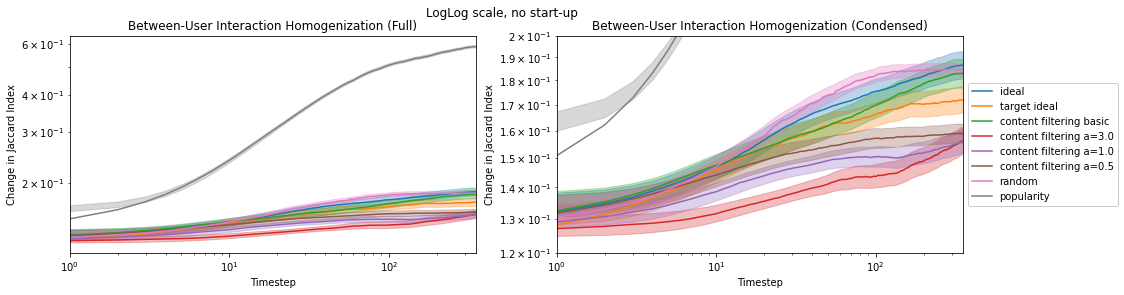

In [16]:
model_keys = ["ideal", "target_ideal", "content_chaney", "content_chaney_j_3.0", "content_chaney_j_1.0", "content_chaney_j_0.5", "random", "popularity"]
metric_str = "interaction_similarity"

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
fig.suptitle("LogLog scale, no start-up")

graph_metrics_loglog(results, metric_str, model_keys, id_to_readable, mult_sd=0.1, conf_sigma=3.0, ax=axs[0])
# axs[0].legend(facecolor='white', framealpha=1, loc='center left', bbox_to_anchor=(1, 0.5))
axs[0].set_xlim(1, timesteps-50)
axs[0].set_ylabel("Change in Jaccard Index")
axs[0].set_xlabel("Timestep")
axs[0].set_title("Between-User Interaction Homogenization (Full)")

# model_keys = ["ideal", "target_ideal", "content_chaney", "content_chaney_j_3.0", "content_chaney_j_1.0", "content_chaney_j_0.5", "random"]

graph_metrics_loglog(results, metric_str, model_keys, id_to_readable, mult_sd=0.1, conf_sigma=3.0, ax=axs[1])
axs[1].legend(facecolor='white', framealpha=1, loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].set_xlim(1, timesteps-50)
axs[1].set_ylim(0.12, 0.20)
axs[1].set_ylabel("Change in Jaccard Index")
axs[1].set_xlabel("Timestep")
axs[1].set_title("Between-User Interaction Homogenization (Condensed)")

fig.savefig("figures/interaction_similarity_full_loglog.pdf", bbox_inches = "tight")